In [8]:
import sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

root = Path.cwd().parents[1]
if str(root) not in sys.path:
    sys.path.append(str(root))

In [9]:
from volatility_smile.src.smile import (
    make_synthetic_market_prices,
    implied_vol_smile_from_prices,
)

In [10]:
S, T, r = 100.0, 1.0, 0.05
strikes = np.linspace(70, 130, 25)

market_prices = make_synthetic_market_prices(
    S,
    strikes,
    T,
    r,
    base_sigma=0.2,
    smile_strength=0.35,
)

iv = implied_vol_smile_from_prices(
    S,
    strikes,
    T,
    r,
    market_prices,
)

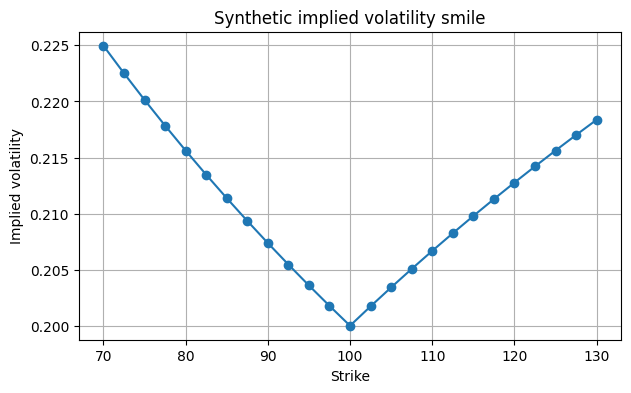

In [11]:
plt.figure(figsize=(7, 4))
plt.plot(strikes, iv, marker="o")
plt.xlabel("Strike")
plt.ylabel("Implied volatility")
plt.title("Synthetic implied volatility smile")
plt.grid(True)

# Dossier figures du chapitre
out_dir = Path.cwd().parents[1] / "figures"
out_dir.mkdir(exist_ok=True)

plt.savefig(out_dir / "smile.png", dpi=200, bbox_inches="tight")

plt.show()